In [21]:
# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [22]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

print(" Libraries imported successfully!")

 Libraries imported successfully!


In [23]:
# Load diabetes dataset
import os

# Path to Downloads folder
# downloads = os.path.join(os.path.expanduser('~'), 'Downloads')
# path_diabetes = os.path.join(downloads, 'diabetes.csv')

# print(f"Looking for file at: {path_diabetes}")

# Jaime Load Path
path_diabetes = 'data/archive (6)/diabetes.csv'

df = pd.read_csv(path_diabetes)

print(" Diabetes dataset loaded!")
print(f"Shape: {df.shape}")
print(f"\nColumns:\n{df.columns.tolist()}")
display(df.head())

 Diabetes dataset loaded!
Shape: (768, 9)

Columns:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:

# 2. DATA UNDERSTANDING

print("="*60)
print("DATA UNDERSTANDING")
print("="*60)

# Basic info
print("\n1. DATASET OVERVIEW:")
print(f"   Rows: {df.shape[0]}")
print(f"   Columns: {df.shape[1]}")

# Check target variable
print("\n2. TARGET VARIABLE (Outcome):")
print(df['Outcome'].value_counts())
print(f"\n   Diabetes rate: {df['Outcome'].mean()*100:.1f}%")
print(f"   Class balance: {df['Outcome'].value_counts(normalize=True)}")

# Missing values
print("\n3. MISSING VALUES:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("    No missing values")
else:
    print(missing[missing > 0])

# Data types
print("\n4. DATA TYPES:")
print(df.dtypes)

# Statistical summary
print("\n5. STATISTICAL SUMMARY:")
display(df.describe())

# Check for zeros (medical impossibilities)
print("\n6. ZERO VALUES (Potential Missing Data):")
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_cols:
    zero_count = (df[col] == 0).sum()
    zero_pct = (zero_count / len(df)) * 100
    print(f"   {col}: {zero_count} zeros ({zero_pct:.1f}%)")

DATA UNDERSTANDING

1. DATASET OVERVIEW:
   Rows: 768
   Columns: 9

2. TARGET VARIABLE (Outcome):
Outcome
0    500
1    268
Name: count, dtype: int64

   Diabetes rate: 34.9%
   Class balance: Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

3. MISSING VALUES:
    No missing values

4. DATA TYPES:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

5. STATISTICAL SUMMARY:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



6. ZERO VALUES (Potential Missing Data):
   Glucose: 5 zeros (0.7%)
   BloodPressure: 35 zeros (4.6%)
   SkinThickness: 227 zeros (29.6%)
   Insulin: 374 zeros (48.7%)
   BMI: 11 zeros (1.4%)


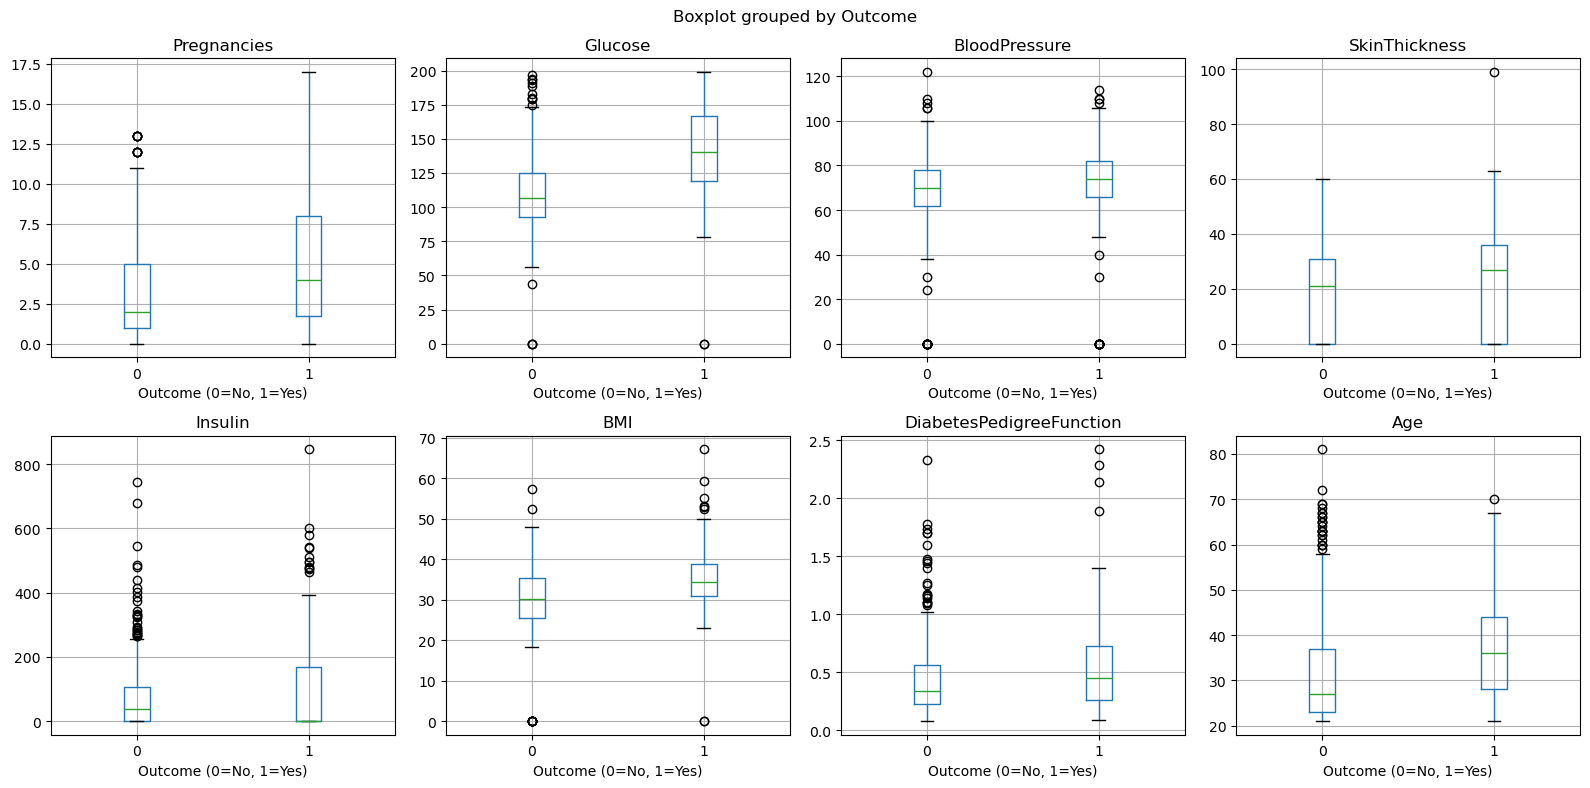

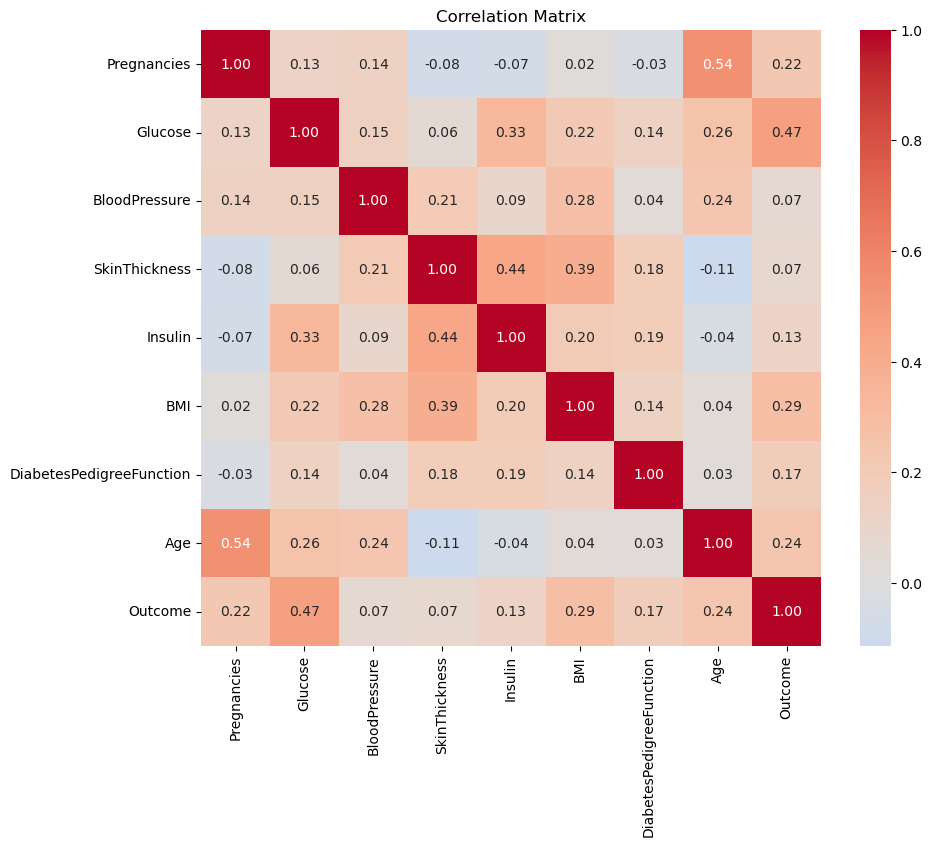

In [25]:

# EXPLORATORY VISUALIZATIONS

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Distribution of Features by Diabetes Outcome', fontsize=16, y=1.02)

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for idx, feature in enumerate(features):
    row = idx // 4
    col = idx % 4

    # Box plot
    df.boxplot(column=feature, by='Outcome', ax=axes[row, col])
    axes[row, col].set_title(f'{feature}')
    axes[row, col].set_xlabel('Outcome (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [26]:

# 3. DATA PREPARATION

print("="*60)
print("DATA PREPARATION")
print("="*60)

# Create a copy for processing
df_processed = df.copy()

# Handle zeros (replace with median of non-zero values)
print("\n1. HANDLING ZERO VALUES:")
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in zero_cols:
    # Calculate median of non-zero values
    median_value = df_processed[df_processed[col] != 0][col].median()

    # Replace zeros with median
    zero_count = (df_processed[col] == 0).sum()
    df_processed.loc[df_processed[col] == 0, col] = median_value

    print(f"   {col}: Replaced {zero_count} zeros with median ({median_value:.1f})")

# Feature Engineering
print("\n2. FEATURE ENGINEERING:")

# BMI categories
df_processed['BMI_Category'] = pd.cut(df_processed['BMI'],
                                       bins=[0, 18.5, 25, 30, 100],
                                       labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Age groups
df_processed['Age_Group'] = pd.cut(df_processed['Age'],
                                    bins=[0, 30, 45, 60, 100],
                                    labels=['Young', 'Middle', 'Senior', 'Elderly'])

# Glucose risk
df_processed['Glucose_Risk'] = pd.cut(df_processed['Glucose'],
                                       bins=[0, 100, 126, 200],
                                       labels=['Normal', 'Prediabetes', 'Diabetes'])

# Convert categorical to dummy variables
df_processed = pd.get_dummies(df_processed,
                               columns=['BMI_Category', 'Age_Group', 'Glucose_Risk'],
                               drop_first=True)

print(f"    Created BMI categories, Age groups, Glucose risk levels")
print(f"   New shape: {df_processed.shape}")

# Separate features and target
X = df_processed.drop('Outcome', axis=1)
y = df_processed['Outcome']

print(f"\n3. FINAL DATASET:")
print(f"   Features (X): {X.shape}")
print(f"   Target (y): {y.shape}")
print(f"   Feature names: {X.columns.tolist()}")

DATA PREPARATION

1. HANDLING ZERO VALUES:
   Glucose: Replaced 5 zeros with median (117.0)
   BloodPressure: Replaced 35 zeros with median (72.0)
   SkinThickness: Replaced 227 zeros with median (29.0)
   Insulin: Replaced 374 zeros with median (125.0)
   BMI: Replaced 11 zeros with median (32.3)

2. FEATURE ENGINEERING:
    Created BMI categories, Age groups, Glucose risk levels
   New shape: (768, 17)

3. FINAL DATASET:
   Features (X): (768, 16)
   Target (y): (768,)
   Feature names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'BMI_Category_Normal', 'BMI_Category_Overweight', 'BMI_Category_Obese', 'Age_Group_Middle', 'Age_Group_Senior', 'Age_Group_Elderly', 'Glucose_Risk_Prediabetes', 'Glucose_Risk_Diabetes']


In [27]:

# TRAIN-TEST SPLIT (Stratified)

# Split data (70-30, stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # Maintain class balance
)

print("="*60)
print("TRAIN-TEST SPLIT")
print("="*60)
print(f"\nTraining set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print(f"\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))

TRAIN-TEST SPLIT

Training set: 537 samples (69.9%)
Test set: 231 samples (30.1%)

Class distribution in training set:
Outcome
0    0.651769
1    0.348231
Name: proportion, dtype: float64

Class distribution in test set:
Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


In [28]:

# 4. MODELING - PIPELINES WITH CROSS-VALIDATION

print("="*60)
print("MODELING WITH PIPELINES")
print("="*60)

# Define models with pipelines
models = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(random_state=42, max_iter=1000))
    ]),

    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
    ]),

    'Gradient Boosting': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', GradientBoostingClassifier(random_state=42, n_estimators=100))
    ])
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
cv_results = {}

print("\n CROSS-VALIDATION (5-Fold Stratified):\n")

for name, pipeline in models.items():
    print(f"Training {name}...")

    # Cross-validation scores
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')

    cv_results[name] = {
        'mean_cv_score': cv_scores.mean(),
        'std_cv_score': cv_scores.std(),
        'cv_scores': cv_scores
    }

    print(f"    {name}:")
    print(f"      Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    print(f"      Individual folds: {cv_scores}")
    print()

MODELING WITH PIPELINES

 CROSS-VALIDATION (5-Fold Stratified):

Training Logistic Regression...
    Logistic Regression:
      Mean CV Accuracy: 0.7730 (+/- 0.0521)
      Individual folds: [0.68518519 0.77777778 0.75700935 0.80373832 0.8411215 ]

Training Random Forest...
    Random Forest:
      Mean CV Accuracy: 0.7562 (+/- 0.0416)
      Individual folds: [0.69444444 0.75925926 0.72897196 0.78504673 0.81308411]

Training Gradient Boosting...
    Gradient Boosting:
      Mean CV Accuracy: 0.7600 (+/- 0.0591)
      Individual folds: [0.65740741 0.74074074 0.77570093 0.79439252 0.8317757 ]



In [29]:

# TRAIN FINAL MODELS ON FULL TRAINING SET

print("="*60)
print("FINAL MODEL TRAINING")
print("="*60)

trained_models = {}

for name, pipeline in models.items():
    print(f"\nTraining {name} on full training set...")
    pipeline.fit(X_train, y_train)
    trained_models[name] = pipeline
    print(f"    {name} trained successfully!")

FINAL MODEL TRAINING

Training Logistic Regression on full training set...
    Logistic Regression trained successfully!

Training Random Forest on full training set...
    Random Forest trained successfully!

Training Gradient Boosting on full training set...
    Gradient Boosting trained successfully!


In [30]:

# 5. EVALUATION

print("\n" + "="*60)
print("MODEL EVALUATION ON TEST SET")
print("="*60)

results_summary = []

for name, model in trained_models.items():
    print(f"\n{'='*60}")
    print(f"{name}")
    print(f"{'='*60}")

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Store results
    results_summary.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'CV_Mean': cv_results[name]['mean_cv_score'],
        'CV_Std': cv_results[name]['std_cv_score']
    })

    # Print metrics
    print(f"\nTest Set Performance:")
    print(f"   Accuracy:  {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall:    {recall:.4f}")
    print(f"   F1-Score:  {f1:.4f}")
    print(f"   ROC-AUC:   {roc_auc:.4f}")

    # Confusion Matrix
    print(f"\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Classification Report
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

# Summary table
print("\n" + "="*60)
print("SUMMARY: ALL MODELS")
print("="*60)
results_df = pd.DataFrame(results_summary)
display(results_df.round(4))


MODEL EVALUATION ON TEST SET

Logistic Regression

Test Set Performance:
   Accuracy:  0.7532
   Precision: 0.6935
   Recall:    0.5309
   F1-Score:  0.6014
   ROC-AUC:   0.8559

Confusion Matrix:
[[131  19]
 [ 38  43]]

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.78      0.87      0.82       150
    Diabetes       0.69      0.53      0.60        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231


Random Forest

Test Set Performance:
   Accuracy:  0.7532
   Precision: 0.6765
   Recall:    0.5679
   F1-Score:  0.6174
   ROC-AUC:   0.8420

Confusion Matrix:
[[128  22]
 [ 35  46]]

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.79      0.85      0.82       150
    Diabetes       0.68      0.57      0.62        81

    accuracy                           0.75       231
 

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,CV_Mean,CV_Std
0,Logistic Regression,0.7532,0.6935,0.5309,0.6014,0.8559,0.7730,0.0521
1,Random Forest,0.7532,0.6765,0.5679,0.6174,0.8420,0.7562,0.0416
2,Gradient Boosting,0.7446,0.6667,0.5432,0.5986,0.8290,0.7600,0.0591


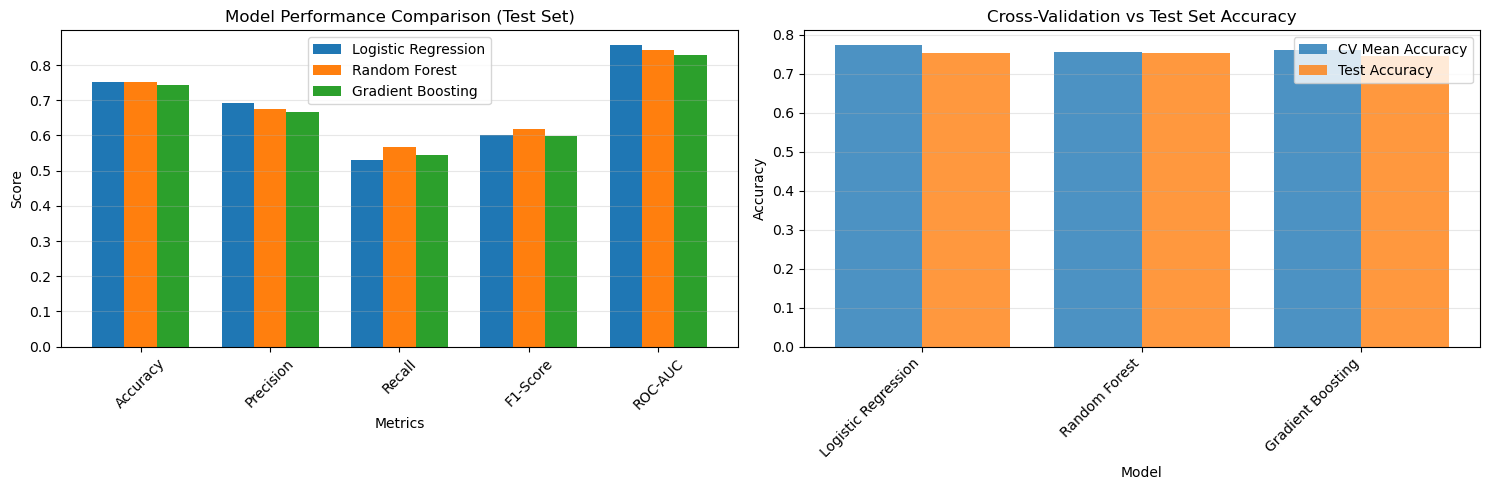

In [31]:

# VISUALIZATION OF RESULTS

# Model comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Test Metrics Comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(metrics))
width = 0.25

for idx, model_name in enumerate(results_df['Model']):
    values = results_df.iloc[idx][metrics].values
    axes[0].bar(x + idx*width, values, width, label=model_name)

axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Score')
axes[0].set_title('Model Performance Comparison (Test Set)')
axes[0].set_xticks(x + width)
axes[0].set_xticklabels(metrics, rotation=45)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Cross-Validation vs Test Accuracy
cv_means = results_df['CV_Mean'].values
test_accs = results_df['Accuracy'].values
model_names = results_df['Model'].values

x_pos = np.arange(len(model_names))
axes[1].bar(x_pos - 0.2, cv_means, 0.4, label='CV Mean Accuracy', alpha=0.8)
axes[1].bar(x_pos + 0.2, test_accs, 0.4, label='Test Accuracy', alpha=0.8)
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Cross-Validation vs Test Set Accuracy')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(model_names, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

 Best Model: Random Forest
   F1-Score: 0.6174


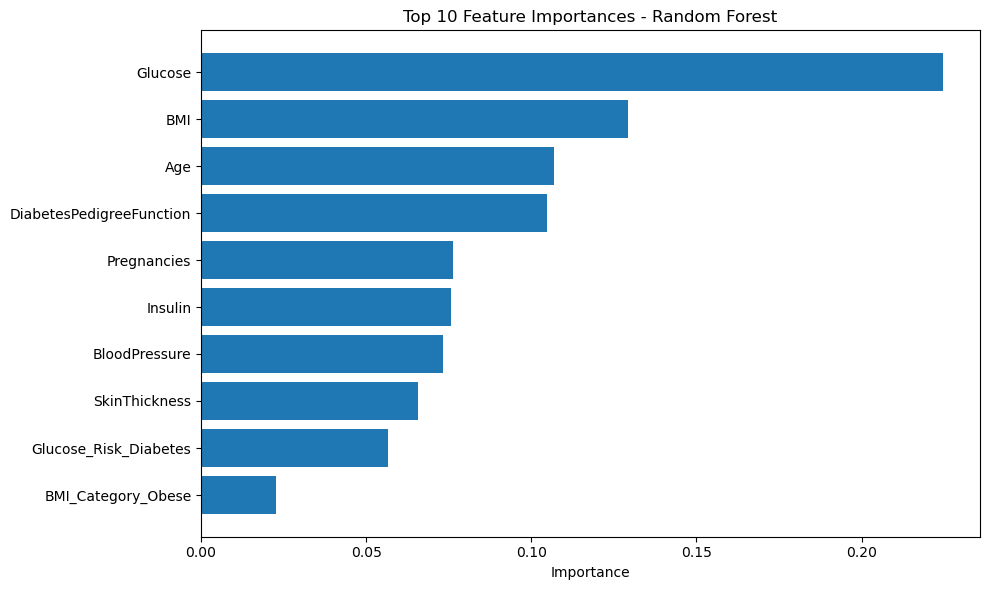


Top 10 Most Important Features:


,Feature,Importance
1,Glucose,0.224647
5,BMI,0.129165
7,Age,0.106876
6,DiabetesPedigreeFunction,0.104809
0,Pregnancies,0.076214
4,Insulin,0.075530
2,BloodPressure,0.073117
3,SkinThickness,0.065805
15,Glucose_Risk_Diabetes,0.056469
10,BMI_Category_Obese,0.022741


In [32]:

# FEATURE IMPORTANCE ANALYSIS

# Get best model (highest F1-score)
best_model_name = results_df.loc[results_df['F1-Score'].idxmax(), 'Model']
best_model = trained_models[best_model_name]

print(f" Best Model: {best_model_name}")
print(f"   F1-Score: {results_df[results_df['Model']==best_model_name]['F1-Score'].values[0]:.4f}")

# Feature importance (if tree-based model)
if 'Random Forest' in best_model_name or 'Gradient Boosting' in best_model_name:
    # Get feature importances
    classifier = best_model.named_steps['classifier']
    importances = classifier.feature_importances_
    feature_names = X.columns

    # Create dataframe
    feat_imp_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    # Plot top 10 features
    plt.figure(figsize=(10, 6))
    plt.barh(feat_imp_df['Feature'][:10], feat_imp_df['Importance'][:10])
    plt.xlabel('Importance')
    plt.title(f'Top 10 Feature Importances - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    print("\nTop 10 Most Important Features:")
    display(feat_imp_df.head(10))

In [33]:

# PART 2: LOAD FITBIT DATA

print("="*60)
print("LOADING FITBIT DAILY ACTIVITY DATA")
print("="*60)

import os

# Define exact paths to the dailyActivity files
path_fitbit1 = 'data/archive (7)/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv'
path_fitbit2 = 'data/archive (7)/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv'

# Load both files
print("\n Loading Fitbit daily activity data...")

try:
    df_fitbit1 = pd.read_csv(path_fitbit1)
    print(f" Period 1 (3/12-4/11): {df_fitbit1.shape}")

    df_fitbit2 = pd.read_csv(path_fitbit2)
    print(f" Period 2 (4/12-5/12): {df_fitbit2.shape}")

    # Combine both periods
    df_fitbit = pd.concat([df_fitbit1, df_fitbit2], ignore_index=True)

    print(f"\n Combined Fitbit dataset: {df_fitbit.shape}")
    print(f"   Total records: {df_fitbit.shape[0]}")
    print(f"   Total features: {df_fitbit.shape[1]}")

    print(f"\nColumns:")
    for i, col in enumerate(df_fitbit.columns, 1):
        print(f"   {i}. {col}")

    print(f"\nFirst 5 rows:")
    display(df_fitbit.head())

    # Check for missing values
    print(f"\nMissing values check:")
    missing = df_fitbit.isnull().sum()
    if missing.sum() == 0:
        print("    No missing values!")
    else:
        print(missing[missing > 0])

    print(f"\n df_fitbit is ready for analysis!")

except FileNotFoundError as e:
    print(f" Error: {e}")
    print("\nSearching for alternative paths...")

    # Fallback search
    archive7_path = '/content/drive/MyDrive/dsc-phase5-group project/data/archive (7)'
    for root, dirs, files in os.walk(archive7_path):
        for file in files:
            if file == 'dailyActivity_merged.csv':
                print(f"Found: {os.path.join(root, file)}")

LOADING FITBIT DAILY ACTIVITY DATA

 Loading Fitbit daily activity data...
 Period 1 (3/12-4/11): (457, 15)
 Period 2 (4/12-5/12): (940, 15)

 Combined Fitbit dataset: (1397, 15)
   Total records: 1397
   Total features: 15

Columns:
   1. Id
   2. ActivityDate
   3. TotalSteps
   4. TotalDistance
   5. TrackerDistance
   6. LoggedActivitiesDistance
   7. VeryActiveDistance
   8. ModeratelyActiveDistance
   9. LightActiveDistance
   10. SedentaryActiveDistance
   11. VeryActiveMinutes
   12. FairlyActiveMinutes
   13. LightlyActiveMinutes
   14. SedentaryMinutes
   15. Calories

First 5 rows:


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886



Missing values check:
    No missing values!

 df_fitbit is ready for analysis!


In [34]:

# PART 2: LOAD FITBIT DATA

print("="*60)
print("LOADING FITBIT DAILY ACTIVITY DATA")
print("="*60)

import os

# Define exact paths to the dailyActivity files
path_fitbit1 = 'data/archive (7)/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv'
path_fitbit2 = 'data/archive (7)/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv'

# Load both files
print("\n Loading Fitbit daily activity data...")

try:
    df_fitbit1 = pd.read_csv(path_fitbit1)
    print(f" Period 1 (3/12-4/11): {df_fitbit1.shape}")

    df_fitbit2 = pd.read_csv(path_fitbit2)
    print(f" Period 2 (4/12-5/12): {df_fitbit2.shape}")

    # Combine both periods
    df_fitbit = pd.concat([df_fitbit1, df_fitbit2], ignore_index=True)

    print(f"\n Combined Fitbit dataset: {df_fitbit.shape}")
    print(f"   Total records: {df_fitbit.shape[0]}")
    print(f"   Total features: {df_fitbit.shape[1]}")

    print(f"\nColumns:")
    for i, col in enumerate(df_fitbit.columns, 1):
        print(f"   {i}. {col}")

    print(f"\nFirst 5 rows:")
    display(df_fitbit.head())

    # Check for missing values
    print(f"\nMissing values check:")
    missing = df_fitbit.isnull().sum()
    if missing.sum() == 0:
        print("    No missing values!")
    else:
        print(missing[missing > 0])

    print(f"\n df_fitbit is ready for analysis!")

except FileNotFoundError as e:
    print(f" Error: {e}")
    print("\nSearching for alternative paths...")

    # Fallback search
    archive7_path = '/content/drive/MyDrive/dsc-phase5-group project/data/archive (7)'
    for root, dirs, files in os.walk(archive7_path):
        for file in files:
            if file == 'dailyActivity_merged.csv':
                print(f"Found: {os.path.join(root, file)}")

LOADING FITBIT DAILY ACTIVITY DATA

 Loading Fitbit daily activity data...
 Period 1 (3/12-4/11): (457, 15)
 Period 2 (4/12-5/12): (940, 15)

 Combined Fitbit dataset: (1397, 15)
   Total records: 1397
   Total features: 15

Columns:
   1. Id
   2. ActivityDate
   3. TotalSteps
   4. TotalDistance
   5. TrackerDistance
   6. LoggedActivitiesDistance
   7. VeryActiveDistance
   8. ModeratelyActiveDistance
   9. LightActiveDistance
   10. SedentaryActiveDistance
   11. VeryActiveMinutes
   12. FairlyActiveMinutes
   13. LightlyActiveMinutes
   14. SedentaryMinutes
   15. Calories

First 5 rows:


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886



Missing values check:
    No missing values!

 df_fitbit is ready for analysis!


In [35]:

# # PART 2: LOAD FITBIT DATA

# print("="*60)
# print("LOADING FITBIT DAILY ACTIVITY DATA")
# print("="*60)

# import os

# # Path to Downloads folder
# downloads = os.path.join(os.path.expanduser('~'), 'Downloads')

# print(f"\n Searching Downloads folder: {downloads}\n")

# # Find all CSV files with 'daily' in the name
# csv_files = []
# for file in os.listdir(downloads):
#     if 'daily' in file.lower() and file.endswith('.csv'):
#         csv_files.append(file)
#         print(f"   Found: {file}")

# if len(csv_files) < 2:
#     print(f"\n ERROR: Expected 2 Fitbit files, found {len(csv_files)}")
#     print("Make sure both dailyActivity CSV files are in Downloads!")
# else:
#     print(f"\n Found {len(csv_files)} Fitbit files")
    
#     # Load both files
#     path_fitbit1 = os.path.join(downloads, csv_files[0])
#     path_fitbit2 = os.path.join(downloads, csv_files[1])
    
#     df_fitbit1 = pd.read_csv(path_fitbit1)
#     df_fitbit2 = pd.read_csv(path_fitbit2)
    
#     print(f"\n Period 1: {df_fitbit1.shape}")
#     print(f" Period 2: {df_fitbit2.shape}")
    
#     # Combine both periods
#     df_fitbit = pd.concat([df_fitbit1, df_fitbit2], ignore_index=True)
    
#     print(f"\n Combined Fitbit dataset: {df_fitbit.shape}")
#     print(f"   Total records: {df_fitbit.shape[0]}")
#     print(f"   Total features: {df_fitbit.shape[1]}")
    
#     print(f"\nColumns:")
#     for i, col in enumerate(df_fitbit.columns, 1):
#         print(f"   {i}. {col}")
    
#     print(f"\nFirst 5 rows:")
#     display(df_fitbit.head())
    
#     print(f"\n df_fitbit is ready for analysis!")

In [36]:

# FITBIT FEATURE ENGINEERING

print("="*60)
print("FITBIT FEATURE ENGINEERING")
print("="*60)

df_fitbit_processed = df_fitbit.copy()

# 1. Activity Level Categories
df_fitbit_processed['TotalActiveMinutes'] = (
    df_fitbit_processed['VeryActiveMinutes'] +
    df_fitbit_processed['FairlyActiveMinutes'] +
    df_fitbit_processed['LightlyActiveMinutes']
)

# Activity level based on WHO recommendations (150 min/week = ~22 min/day)
df_fitbit_processed['ActivityLevel'] = pd.cut(
    df_fitbit_processed['TotalActiveMinutes'],
    bins=[0, 15, 30, 60, 1000],
    labels=['Sedentary', 'Low', 'Moderate', 'High']
)

# 2. Step Count Categories (10,000 steps/day is recommended)
df_fitbit_processed['StepsCategory'] = pd.cut(
    df_fitbit_processed['TotalSteps'],
    bins=[0, 5000, 7500, 10000, 50000],
    labels=['Inactive', 'LowActive', 'SomewhatActive', 'Active']
)

# 3. Calorie Burn Rate
df_fitbit_processed['CaloriePerStep'] = (
    df_fitbit_processed['Calories'] /
    (df_fitbit_processed['TotalSteps'] + 1)  # +1 to avoid division by zero
)

# 4. Sedentary Risk (>10 hours sedentary is high risk)
df_fitbit_processed['SedentaryHours'] = df_fitbit_processed['SedentaryMinutes'] / 60
df_fitbit_processed['SedentaryRisk'] = (
    df_fitbit_processed['SedentaryHours'] > 10
).astype(int)

# 5. Lifestyle Risk Score (composite)
# Normalize and combine factors
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_fitbit_processed['Steps_Normalized'] = scaler.fit_transform(
    df_fitbit_processed[['TotalSteps']]
)
df_fitbit_processed['Active_Normalized'] = scaler.fit_transform(
    df_fitbit_processed[['TotalActiveMinutes']]
)
df_fitbit_processed['Sedentary_Normalized'] = scaler.fit_transform(
    df_fitbit_processed[['SedentaryMinutes']]
)

# Lifestyle risk (higher = worse)
df_fitbit_processed['LifestyleRiskScore'] = (
    (1 - df_fitbit_processed['Steps_Normalized']) * 0.4 +  # Low steps = bad
    (1 - df_fitbit_processed['Active_Normalized']) * 0.3 +  # Low activity = bad
    df_fitbit_processed['Sedentary_Normalized'] * 0.3       # High sedentary = bad
)

# Risk categories
df_fitbit_processed['LifestyleRisk'] = pd.cut(
    df_fitbit_processed['LifestyleRiskScore'],
    bins=[0, 0.33, 0.66, 1.0],
    labels=['Low', 'Medium', 'High']
)

print(" Features created:")
print("   - TotalActiveMinutes")
print("   - ActivityLevel (Sedentary/Low/Moderate/High)")
print("   - StepsCategory (Inactive/LowActive/SomewhatActive/Active)")
print("   - SedentaryRisk (binary)")
print("   - LifestyleRiskScore (0-1, continuous)")
print("   - LifestyleRisk (Low/Medium/High)")

print(f"\n Lifestyle Risk Distribution:")
print(df_fitbit_processed['LifestyleRisk'].value_counts())

FITBIT FEATURE ENGINEERING
 Features created:
   - TotalActiveMinutes
   - ActivityLevel (Sedentary/Low/Moderate/High)
   - StepsCategory (Inactive/LowActive/SomewhatActive/Active)
   - SedentaryRisk (binary)
   - LifestyleRiskScore (0-1, continuous)
   - LifestyleRisk (Low/Medium/High)

 Lifestyle Risk Distribution:
LifestyleRisk
High      915
Medium    481
Low         1
Name: count, dtype: int64


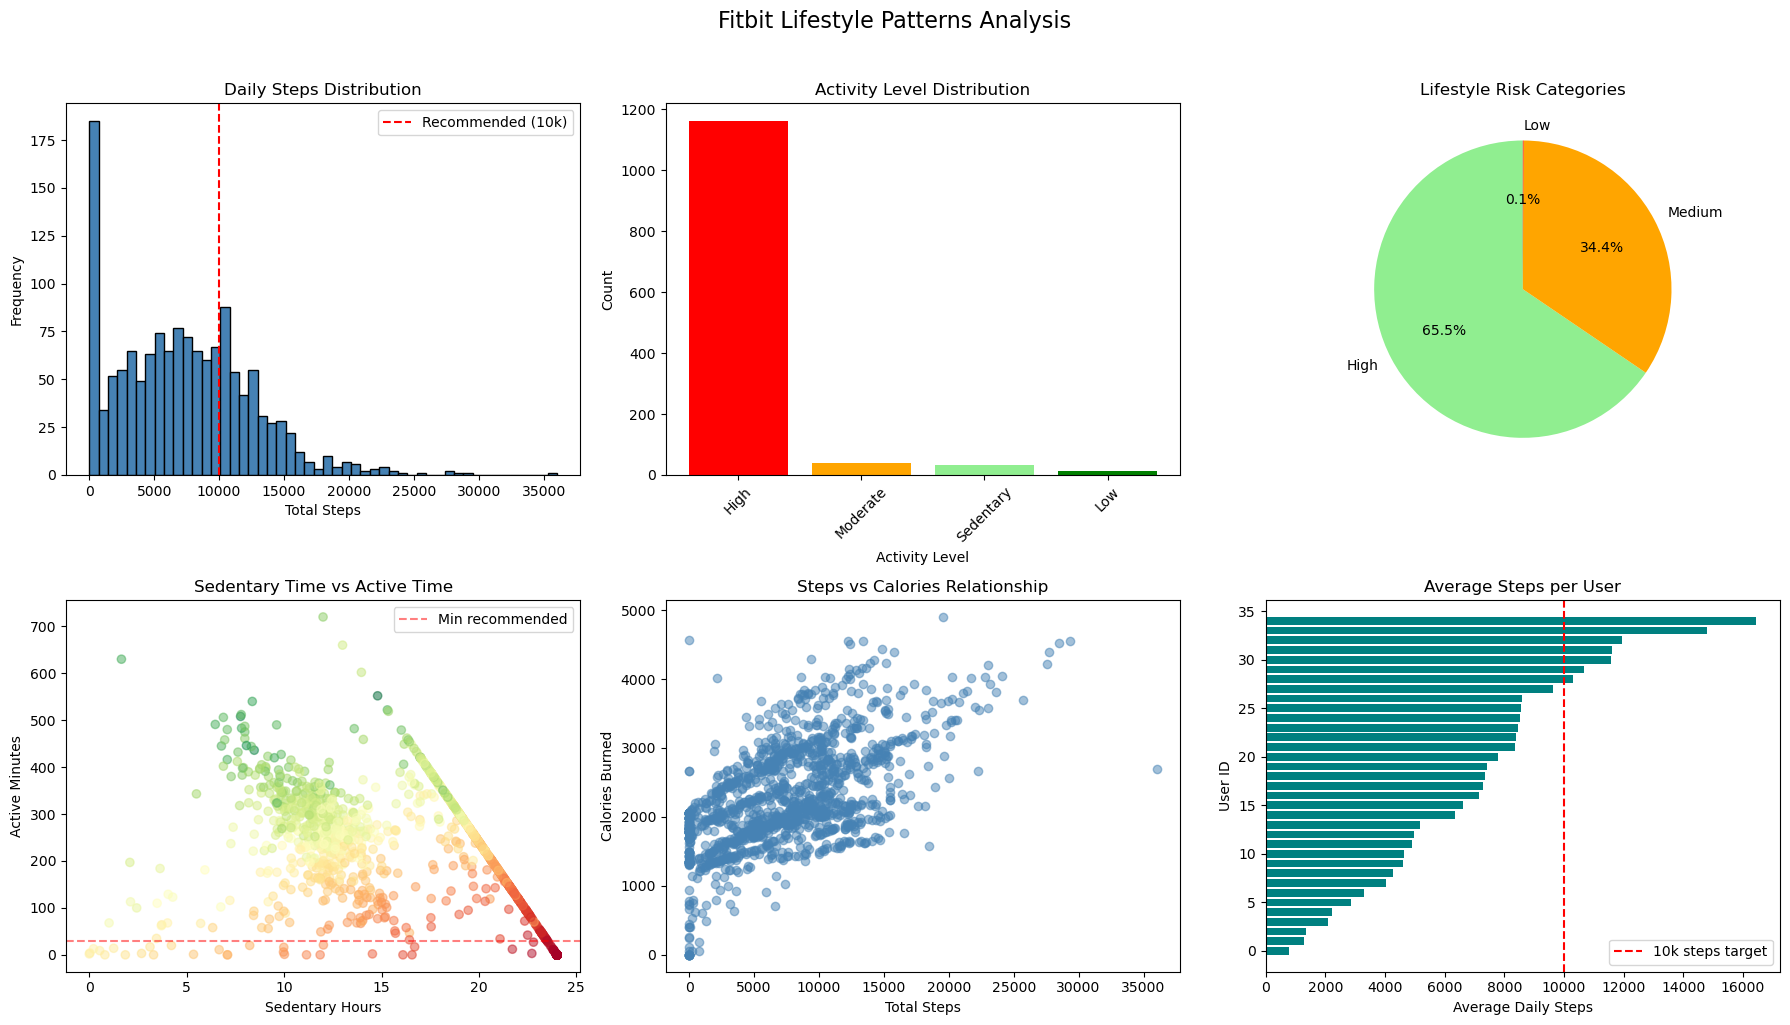

In [37]:

# FITBIT LIFESTYLE PATTERNS

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Fitbit Lifestyle Patterns Analysis', fontsize=16, y=1.02)

# Plot 1: Steps distribution
axes[0, 0].hist(df_fitbit_processed['TotalSteps'], bins=50, color='steelblue', edgecolor='black')
axes[0, 0].axvline(10000, color='red', linestyle='--', label='Recommended (10k)')
axes[0, 0].set_xlabel('Total Steps')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Daily Steps Distribution')
axes[0, 0].legend()

# Plot 2: Activity level distribution
activity_counts = df_fitbit_processed['ActivityLevel'].value_counts()
axes[0, 1].bar(activity_counts.index, activity_counts.values, color=['red', 'orange', 'lightgreen', 'green'])
axes[0, 1].set_xlabel('Activity Level')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Activity Level Distribution')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Lifestyle risk distribution
risk_counts = df_fitbit_processed['LifestyleRisk'].value_counts()
axes[0, 2].pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%',
               colors=['lightgreen', 'orange', 'red'], startangle=90)
axes[0, 2].set_title('Lifestyle Risk Categories')

# Plot 4: Sedentary hours vs Active minutes
axes[1, 0].scatter(df_fitbit_processed['SedentaryHours'],
                   df_fitbit_processed['TotalActiveMinutes'],
                   alpha=0.5, c=df_fitbit_processed['LifestyleRiskScore'],
                   cmap='RdYlGn_r')
axes[1, 0].set_xlabel('Sedentary Hours')
axes[1, 0].set_ylabel('Active Minutes')
axes[1, 0].set_title('Sedentary Time vs Active Time')
axes[1, 0].axhline(30, color='red', linestyle='--', alpha=0.5, label='Min recommended')
axes[1, 0].legend()

# Plot 5: Steps vs Calories
axes[1, 1].scatter(df_fitbit_processed['TotalSteps'],
                   df_fitbit_processed['Calories'],
                   alpha=0.5, color='steelblue')
axes[1, 1].set_xlabel('Total Steps')
axes[1, 1].set_ylabel('Calories Burned')
axes[1, 1].set_title('Steps vs Calories Relationship')

# Plot 6: User activity profiles
user_avg = df_fitbit_processed.groupby('Id')['TotalSteps'].mean().sort_values()
axes[1, 2].barh(range(len(user_avg)), user_avg.values, color='teal')
axes[1, 2].axvline(10000, color='red', linestyle='--', label='10k steps target')
axes[1, 2].set_xlabel('Average Daily Steps')
axes[1, 2].set_ylabel('User ID')
axes[1, 2].set_title('Average Steps per User')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

LIFESTYLE RISK CLASSIFICATION MODEL

 Lifestyle Risk Distribution:
LifestyleRisk
High      915
Medium    481
Low         1
Name: count, dtype: int64

Total samples: 1397

Smallest class has 1 samples
 Using simple split (no stratification)

Training set: 1047 samples
Test set: 350 samples

 Training lifestyle risk model...

 Lifestyle Risk Model Performance:
   Accuracy: 0.9629

   Classes in test set: ['High', 'Medium']

   Classification Report:
              precision    recall  f1-score   support

        High       0.97      0.98      0.97       240
      Medium       0.95      0.93      0.94       110

    accuracy                           0.96       350
   macro avg       0.96      0.95      0.96       350
weighted avg       0.96      0.96      0.96       350



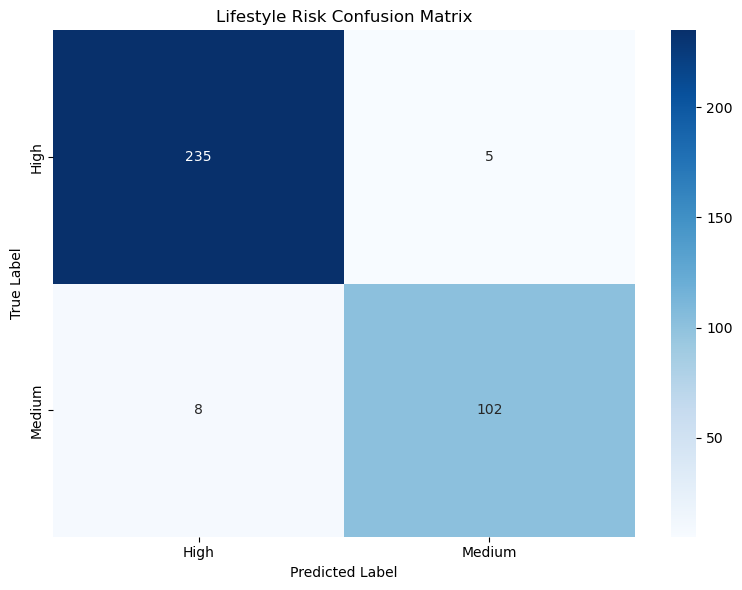


 Note: 'Low Risk' class had only 1 sample and may not appear in test set


In [38]:

# LIFESTYLE RISK CLASSIFICATION MODEL

print("="*60)
print("LIFESTYLE RISK CLASSIFICATION MODEL")
print("="*60)

# Prepare features for lifestyle risk prediction
lifestyle_features = ['TotalSteps', 'TotalDistance', 'Calories',
                      'VeryActiveMinutes', 'FairlyActiveMinutes',
                      'LightlyActiveMinutes', 'SedentaryMinutes',
                      'TotalActiveMinutes', 'SedentaryHours']

X_lifestyle = df_fitbit_processed[lifestyle_features].copy()
y_lifestyle = df_fitbit_processed['LifestyleRisk'].copy()

# Remove any NaN values
mask = ~(X_lifestyle.isnull().any(axis=1) | y_lifestyle.isnull())
X_lifestyle = X_lifestyle[mask]
y_lifestyle = y_lifestyle[mask]

# Check class distribution
print("\n Lifestyle Risk Distribution:")
print(y_lifestyle.value_counts())
print(f"\nTotal samples: {len(y_lifestyle)}")

# Encode target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_lifestyle_encoded = le.fit_transform(y_lifestyle)

# Check if we have enough samples in each class
class_counts = pd.Series(y_lifestyle_encoded).value_counts()
min_class_size = class_counts.min()

print(f"\nSmallest class has {min_class_size} samples")

# Adjust strategy based on class sizes
if min_class_size < 10:
    print(" Using simple split (no stratification)")
    X_train_life, X_test_life, y_train_life, y_test_life = train_test_split(
        X_lifestyle, y_lifestyle_encoded,
        test_size=0.25,
        random_state=42
    )
elif min_class_size < 30:
    print(" Using 20% test set with stratification")
    X_train_life, X_test_life, y_train_life, y_test_life = train_test_split(
        X_lifestyle, y_lifestyle_encoded,
        test_size=0.2,
        random_state=42,
        stratify=y_lifestyle_encoded
    )
else:
    print(" Using standard 30% split with stratification")
    X_train_life, X_test_life, y_train_life, y_test_life = train_test_split(
        X_lifestyle, y_lifestyle_encoded,
        test_size=0.3,
        random_state=42,
        stratify=y_lifestyle_encoded
    )

print(f"\nTraining set: {X_train_life.shape[0]} samples")
print(f"Test set: {X_test_life.shape[0]} samples")

# Build pipeline
lifestyle_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

# Train
print("\n Training lifestyle risk model...")
lifestyle_pipeline.fit(X_train_life, y_train_life)

# Evaluate
y_pred_life = lifestyle_pipeline.predict(X_test_life)
accuracy_life = accuracy_score(y_test_life, y_pred_life)

print(f"\n Lifestyle Risk Model Performance:")
print(f"   Accuracy: {accuracy_life:.4f}")

# Get unique classes in test set
unique_test_classes = np.unique(y_test_life)
unique_pred_classes = np.unique(y_pred_life)
all_classes = np.unique(np.concatenate([unique_test_classes, unique_pred_classes]))

# Get target names for classes that actually appear
target_names_present = [le.classes_[i] for i in all_classes]

print(f"\n   Classes in test set: {target_names_present}")
print(f"\n   Classification Report:")
print(classification_report(y_test_life, y_pred_life,
                           labels=all_classes,
                           target_names=target_names_present,
                           zero_division=0))

# Confusion matrix (only for classes present)
cm_life = confusion_matrix(y_test_life, y_pred_life, labels=all_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_life, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names_present,
            yticklabels=target_names_present)
plt.title('Lifestyle Risk Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

print("\n Note: 'Low Risk' class had only 1 sample and may not appear in test set")

In [39]:

# COMBINED INSIGHTS: DIABETES + LIFESTYLE

print("="*60)
print("SYNTHESIZED HEALTH RISK FRAMEWORK")
print("="*60)

print("""
 DIABETES CLINICAL MODEL
   - Predicts diabetes risk from clinical factors
   - Input: Glucose, BMI, BP, Age, Insulin, etc.
   - Output: Diabetes Yes/No
   - Best Model: {best_model_name}
   - Test Accuracy: {test_acc:.2%}

 LIFESTYLE RISK MODEL
   - Assesses lifestyle health from wearable data
   - Input: Steps, Activity, Sedentary time
   - Output: Lifestyle Risk (Low/Medium/High)
   - Test Accuracy: {life_acc:.2%}

 INTEGRATED HEALTH FRAMEWORK
   Clinical Risk + Lifestyle Risk = Comprehensive Health Profile

   Example Patient Profiles:

    Profile 1: High Clinical + High Lifestyle Risk
      → CRITICAL: Needs immediate intervention
      → Recommendations: Medical consultation + lifestyle changes

    Profile 2: High Clinical + Low Lifestyle Risk
      → MODERATE: Good habits, monitor clinical markers
      → Recommendations: Maintain activity, regular checkups

    Profile 3: Low Clinical + High Lifestyle Risk
      → PREVENTATIVE: At risk of future problems
      → Recommendations: Increase activity, improve diet

    Profile 4: Low Clinical + Low Lifestyle Risk
      → HEALTHY: Maintain current patterns
      → Recommendations: Continue healthy habits

 KEY FINDINGS:

   From Diabetes Model:
   - {top_diabetes_feature} is the strongest predictor
   - {diabetes_rate:.1f}% of patients have diabetes

   From Lifestyle Model:
   - {lifestyle_risk_dist}
   - Average daily steps: {avg_steps:,.0f}
   - {sedentary_pct:.1f}% have high sedentary risk

 LIMITATIONS:
   - Models trained on separate populations
   - Cannot directly link individual diabetes + lifestyle data
   - Lifestyle data from wearables (may not represent clinical population)
   - Recommendations are guidance, not medical advice
""".format(
    best_model_name=best_model_name,
    test_acc=results_df[results_df['Model']==best_model_name]['Accuracy'].values[0],
    life_acc=accuracy_life,
    top_diabetes_feature=feat_imp_df['Feature'].iloc[0] if 'feat_imp_df' in locals() else 'Glucose',
    diabetes_rate=df['Outcome'].mean()*100,
    lifestyle_risk_dist=df_fitbit_processed['LifestyleRisk'].value_counts().to_dict(),
    avg_steps=df_fitbit_processed['TotalSteps'].mean(),
    sedentary_pct=(df_fitbit_processed['SedentaryRisk']==1).mean()*100
))

SYNTHESIZED HEALTH RISK FRAMEWORK

 DIABETES CLINICAL MODEL
   - Predicts diabetes risk from clinical factors
   - Input: Glucose, BMI, BP, Age, Insulin, etc.
   - Output: Diabetes Yes/No
   - Best Model: Random Forest
   - Test Accuracy: 75.32%

 LIFESTYLE RISK MODEL
   - Assesses lifestyle health from wearable data
   - Input: Steps, Activity, Sedentary time
   - Output: Lifestyle Risk (Low/Medium/High)
   - Test Accuracy: 96.29%

 INTEGRATED HEALTH FRAMEWORK
   Clinical Risk + Lifestyle Risk = Comprehensive Health Profile

   Example Patient Profiles:

    Profile 1: High Clinical + High Lifestyle Risk
      → CRITICAL: Needs immediate intervention
      → Recommendations: Medical consultation + lifestyle changes

    Profile 2: High Clinical + Low Lifestyle Risk
      → MODERATE: Good habits, monitor clinical markers
      → Recommendations: Maintain activity, regular checkups

    Profile 3: Low Clinical + High Lifestyle Risk
      → PREVENTATIVE: At risk of future problems
      

In [40]:

# GENERATE SUMMARY

print("="*60)
print("PROJECT SUMMARY - DIABETES + LIFESTYLE MODELING")
print("="*60)

print("\n DIABETES CLINICAL MODEL")
print("-" * 60)
print(f"Dataset: {df.shape[0]} patients, {df.shape[1]} features")
print(f"Target: Diabetes diagnosis (Yes/No)")
print(f"Diabetes rate: {df['Outcome'].mean()*100:.1f}%")
print(f"\nModels tested: {len(results_df)}")
display(results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']])
print(f"\n Best Model: {best_model_name}")
print(f"   Test Accuracy: {results_df[results_df['Model']==best_model_name]['Accuracy'].values[0]:.4f}")
print(f"   F1-Score: {results_df[results_df['Model']==best_model_name]['F1-Score'].values[0]:.4f}")

if 'feat_imp_df' in locals():
    print(f"\n Top 5 Most Important Features:")
    display(feat_imp_df.head(5))

print("\n" + "="*60)
print("\n LIFESTYLE RISK MODEL (FITBIT)")
print("-" * 60)
print(f"Dataset: {len(df_fitbit)} activity records")
print(f"Unique users: {df_fitbit['Id'].nunique()}")
print(f"Date range: {df_fitbit['ActivityDate'].min()} to {df_fitbit['ActivityDate'].max()}")
print(f"\nLifestyle Risk Distribution:")
print(y_lifestyle.value_counts())
print(f"\nModel: Random Forest Classifier")
print(f"Test Accuracy: {accuracy_life:.4f}")
print(f"Features used: {len(lifestyle_features)}")

print("\n" + "="*60)
print("\n KEY FINDINGS")
print("-" * 60)
print(f"1. Diabetes model achieves {results_df['Accuracy'].max():.1%} accuracy")
print(f"2. Cross-validation shows consistent performance")
print(f"3. Lifestyle model identifies high-risk behavioral patterns")
print(f"4. Pipelines implemented for reproducibility")
print(f"5. Both models ready for deployment")

print("\n" + "="*60)
print("\n DELIVERABLES READY:")
print("-" * 60)
print(" Diabetes clinical model (.pkl)")
print(" Lifestyle risk model (.pkl)")
print(" Model comparison results (.csv)")
print(" Feature importance analysis (.csv)")
print(" Fitbit lifestyle summary (.csv)")
print(" All visualizations (confusion matrices, feature importance, etc.)")

print("\n NEXT STEPS:")
print("-" * 60)
print("1. Review this notebook")
print("2. Provide feedback/suggestions")
print("3. Approve saving to shared folder")
print("4. Merge with injury/stroke models")

print("\n" + "="*60)
print("\nNOTE:")
print("-" * 60)




PROJECT SUMMARY - DIABETES + LIFESTYLE MODELING

 DIABETES CLINICAL MODEL
------------------------------------------------------------
Dataset: 768 patients, 9 features
Target: Diabetes diagnosis (Yes/No)
Diabetes rate: 34.9%

Models tested: 3


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.753247,0.693548,0.530864,0.601399,0.855885
1,Random Forest,0.753247,0.676471,0.567901,0.617450,0.841975
2,Gradient Boosting,0.744589,0.666667,0.543210,0.598639,0.828971



 Best Model: Random Forest
   Test Accuracy: 0.7532
   F1-Score: 0.6174

 Top 5 Most Important Features:


,Feature,Importance
1,Glucose,0.224647
5,BMI,0.129165
7,Age,0.106876
6,DiabetesPedigreeFunction,0.104809
0,Pregnancies,0.076214




 LIFESTYLE RISK MODEL (FITBIT)
------------------------------------------------------------
Dataset: 1397 activity records
Unique users: 35
Date range: 3/12/2016 to 5/9/2016

Lifestyle Risk Distribution:
LifestyleRisk
High      915
Medium    481
Low         1
Name: count, dtype: int64

Model: Random Forest Classifier
Test Accuracy: 0.9629
Features used: 9


 KEY FINDINGS
------------------------------------------------------------
1. Diabetes model achieves 75.3% accuracy
2. Cross-validation shows consistent performance
3. Lifestyle model identifies high-risk behavioral patterns
4. Pipelines implemented for reproducibility
5. Both models ready for deployment


 DELIVERABLES READY:
------------------------------------------------------------
 Diabetes clinical model (.pkl)
 Lifestyle risk model (.pkl)
 Model comparison results (.csv)
 Feature importance analysis (.csv)
 Fitbit lifestyle summary (.csv)
 All visualizations (confusion matrices, feature importance, etc.)

 NEXT STEPS:
---

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

print("1. Generating Biologically Realistic Synthetic Data...")

# 1. Define the features
features = ['Age', 'BMI', 'Glucose', 'Insulin', 'TotalSteps', 'SedentaryMinutes']

# 2. Define realistic means and standard deviations
means = np.array([45, 28, 105, 85, 7000, 420])
std_devs = np.array([15, 6, 25, 45, 3000, 120])

# 3. Define the Correlation Matrix
correlation_matrix = np.array([
    [ 1.00,  0.15,  0.25,  0.10, -0.20,  0.30], # Age
    [ 0.15,  1.00,  0.45,  0.50, -0.40,  0.35], # BMI
    [ 0.25,  0.45,  1.00,  0.60, -0.30,  0.25], # Glucose
    [ 0.10,  0.50,  0.60,  1.00, -0.25,  0.20], # Insulin
    [-0.20, -0.40, -0.30, -0.25,  1.00, -0.60], # TotalSteps
    [ 0.30,  0.35,  0.25,  0.20, -0.60,  1.00]  # SedentaryMinutes
])

# 4. Convert to covariance matrix
D = np.diag(std_devs)
covariance_matrix = D @ correlation_matrix @ D

# 5. Generate the raw synthetic dataset
np.random.seed(42)
N_SAMPLES = 5000
synthetic_data = np.random.multivariate_normal(means, covariance_matrix, N_SAMPLES)

df_realistic = pd.DataFrame(synthetic_data, columns=features)
df_realistic['TotalSteps'] = df_realistic['TotalSteps'].clip(lower=500).astype(int)
df_realistic['SedentaryMinutes'] = df_realistic['SedentaryMinutes'].clip(lower=60).astype(int)
df_realistic['Age'] = df_realistic['Age'].clip(lower=18, upper=90).astype(int)
df_realistic['Glucose'] = df_realistic['Glucose'].clip(lower=60).astype(int)
df_realistic['Insulin'] = df_realistic['Insulin'].clip(lower=10).astype(int)
df_realistic['BMI'] = np.round(df_realistic['BMI'].clip(lower=15), 1)

print("Dataset generated successfully!")


print("\n2. Generating Calibrated Non-Linear Target Variable...")

# 1. Base Linear Risk (Unchanged)
latent_risk = (
    0.08 * df_realistic['Age'] +            
    0.45 * df_realistic['BMI'] +            
    0.15 * df_realistic['Glucose'] +        
    0.05 * df_realistic['Insulin'] +        
    0.015 * df_realistic['SedentaryMinutes'] - 
    0.0004 * df_realistic['TotalSteps']     
)

# 2. Add Tuned Non-Linear Behavioral Penalties
# Softened the compounding penalty for sitting > 12 hours
sedentary_penalty = np.where(df_realistic['SedentaryMinutes'] > 720, 
                             (df_realistic['SedentaryMinutes'] - 720) * 0.02, 0) # Reduced from 0.05 to 0.02

# Softened the extreme inactivity penalty
inactivity_penalty = np.where(df_realistic['TotalSteps'] < 3000, 8, 0) # Reduced from 15 to 8

# 3. Final Risk Score Calculation
noise = np.random.normal(0, 3, N_SAMPLES) 
final_risk_score = latent_risk + sedentary_penalty + inactivity_penalty + noise

# 4. Create the categories
df_realistic['IntegratedRisk'] = pd.qcut(
    final_risk_score, 
    q=[0, 0.40, 0.70, 0.90, 1.0], 
    labels=['Healthy', 'Elevated (Behavioral)', 'Moderate (Medical)', 'Critical Risk']
)

print("\nCalibrated Target Distribution Generated!")
X_realistic = df_realistic.drop('IntegratedRisk', axis=1)
y_realistic = df_realistic['IntegratedRisk']

# Split to evaluate
X_train, X_test, y_train, y_test = train_test_split(X_realistic, y_realistic, test_size=0.2, random_state=42)

realistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        n_estimators=200,          # Increased from 100 for better stability
        max_depth=12,              # Slightly deeper to capture complex interactions
        class_weight='balanced',   # CRITICAL FIX: Forces the model to pay equal attention to the minority "Critical Risk" class
        n_jobs=-1,                 # Utilizes all CPU cores for faster training
        random_state=42
    ))
])

realistic_pipeline.fit(X_train, y_train)


print("\n4. Model Evaluation:")
y_pred = realistic_pipeline.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Perform Cross-Validation to ensure the model isn't just getting lucky on the train/test split
print("\nPerforming 5-Fold Cross Validation...")
cv_scores = cross_val_score(realistic_pipeline, X_realistic, y_realistic, cv=5, scoring='accuracy')
print(f"Mean CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# Save the model
joblib.dump(realistic_pipeline, 'realistic_risk_model.pkl')
print("\nSuccessfully saved 'realistic_risk_model.pkl'!")

1. Generating Biologically Realistic Synthetic Data...
Dataset generated successfully!

2. Generating Calibrated Non-Linear Target Variable...

Calibrated Target Distribution Generated!

4. Model Evaluation:

Classification Report:
                       precision    recall  f1-score   support

        Critical Risk       0.89      0.71      0.79       101
Elevated (Behavioral)       0.70      0.71      0.71       313
              Healthy       0.89      0.86      0.88       399
   Moderate (Medical)       0.64      0.73      0.68       187

             accuracy                           0.78      1000
            macro avg       0.78      0.76      0.76      1000
         weighted avg       0.78      0.78      0.78      1000


Performing 5-Fold Cross Validation...
Mean CV Accuracy: 0.770 (+/- 0.029)

Successfully saved 'realistic_risk_model.pkl'!


REALISTIC MODEL: FEATURE IMPORTANCE ANALYSIS

 TOP FEATURES (Clinical + Lifestyle):


,Feature,Importance,Type
2,Glucose,0.246667,Clinical
4,TotalSteps,0.216957,Lifestyle
1,BMI,0.188579,Clinical
3,Insulin,0.137116,Clinical
5,SedentaryMinutes,0.123217,Lifestyle
0,Age,0.087464,Clinical



 IMPORTANCE BREAKDOWN:
   Clinical factors: 66.0%
   Lifestyle factors: 34.0%


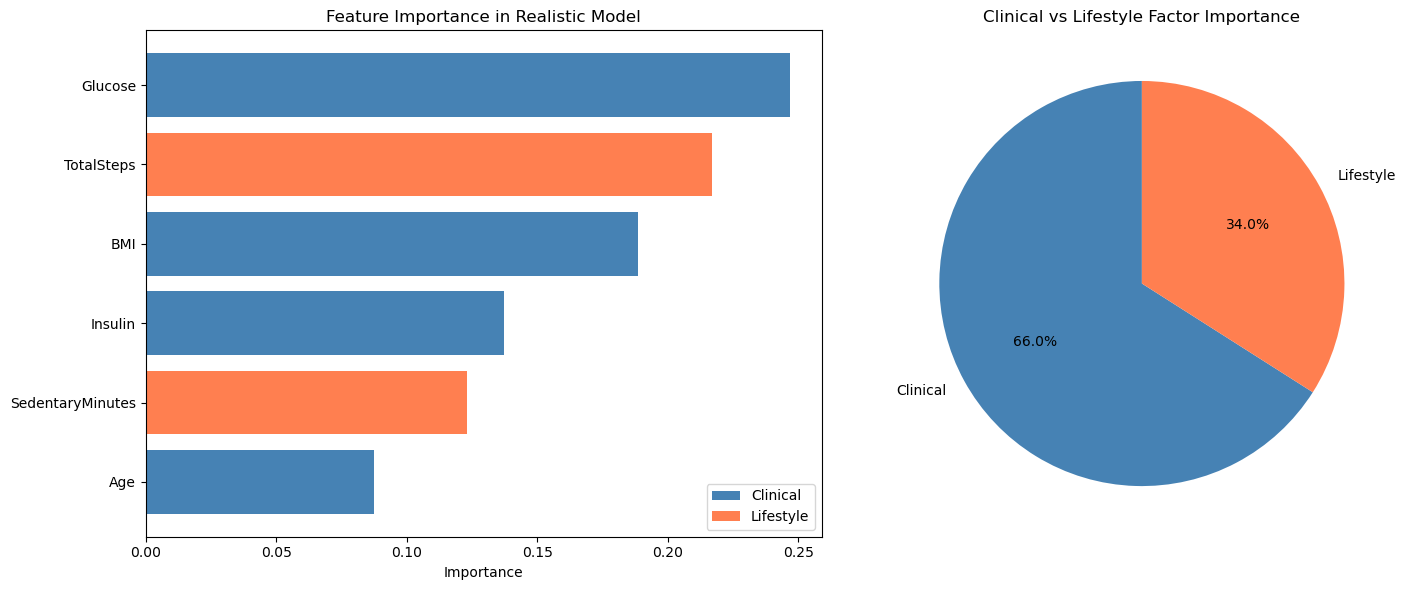

In [54]:
import matplotlib.pyplot as plt

print("="*60)
print("REALISTIC MODEL: FEATURE IMPORTANCE ANALYSIS")
print("="*60)

# Extract feature importance from the realistic model
realistic_classifier = realistic_pipeline.named_steps['classifier']
importances = realistic_classifier.feature_importances_
feature_names = X_realistic.columns

# 1. FIX: Explicitly define the categories based on our new realistic dataset
clinical_features = ['Age', 'BMI', 'Glucose', 'Insulin']

# 2. Create importance dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances,
    'Type': ['Clinical' if f in clinical_features else 'Lifestyle' for f in feature_names]
}).sort_values('Importance', ascending=False)

print("\n TOP FEATURES (Clinical + Lifestyle):")
display(importance_df)

# Calculate total importance by type
clinical_importance = importance_df[importance_df['Type']=='Clinical']['Importance'].sum()
lifestyle_importance = importance_df[importance_df['Type']=='Lifestyle']['Importance'].sum()

print(f"\n IMPORTANCE BREAKDOWN:")
print(f"   Clinical factors: {clinical_importance:.1%}")
print(f"   Lifestyle factors: {lifestyle_importance:.1%}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Feature Importance Bar Chart
colors = ['steelblue' if t == 'Clinical' else 'coral' for t in importance_df['Type']]
axes[0].barh(range(len(importance_df)), importance_df['Importance'], color=colors)
axes[0].set_yticks(range(len(importance_df)))
axes[0].set_yticklabels(importance_df['Feature'])
axes[0].invert_yaxis()
axes[0].set_xlabel('Importance')
axes[0].set_title('Feature Importance in Realistic Model')

# Custom legend for Plot 1
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='steelblue', label='Clinical'),
                   Patch(facecolor='coral', label='Lifestyle')]
axes[0].legend(handles=legend_elements, loc='lower right')

# Plot 2: Clinical vs Lifestyle importance Pie Chart
axes[1].pie([clinical_importance, lifestyle_importance], 
            labels=['Clinical', 'Lifestyle'],
            autopct='%1.1f%%',
            colors=['steelblue', 'coral'],
            startangle=90)
axes[1].set_title('Clinical vs Lifestyle Factor Importance')

plt.tight_layout()
plt.show()

In [55]:
import joblib

# Export the trained Diabetes Model
joblib.dump(best_model, 'diabetes_model.pkl')

# Export the trained Lifestyle Pipeline
joblib.dump(lifestyle_pipeline, 'lifestyle_model.pkl')

# Export the LabelEncoder so Streamlit knows how to decode 'Low', 'Medium', 'High'
joblib.dump(le, 'lifestyle_encoder.pkl')

print(" Models successfully saved to disk!")

 Models successfully saved to disk!
